step-1 : Importing the essential libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

step-2 :Loading MNIST Data set

In [ ]:
(mnist_train_images,mnist_train_labels),(minst_test_images, mnist_test_labels) = mnist.load_data()

In [ ]:
train = mnist_train_images.reshape(60000,784)
test = minst_test_images.reshape(10000,784)

In [ ]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255

In [ ]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

step-3: importing matplotlib for data visualizing


In [ ]:
import matplotlib.pyplot as plt


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


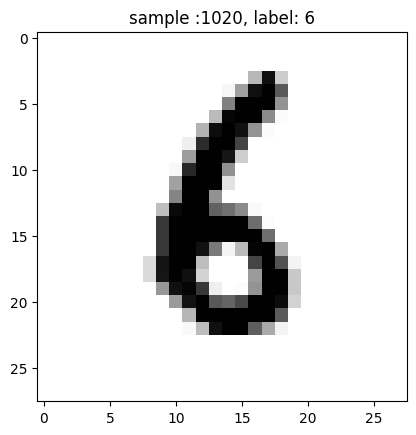

In [ ]:
def number(num):
  print(train_labels[num])
  label = train_labels[num].argmax(axis = 0)
  image = train[num].reshape([28,28])
  plt.title('sample :%d, label: %d' %(num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
number(1020)

step-4: Buliding sequential model in neural network

In [ ]:
model = Sequential()
model.add(Dense(512, activation ='relu',input_shape=(784,)))

In [ ]:
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


step-5: model optimization


In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer= RMSprop(),metrics = ['accuracy'])

step-6: fitting the training data to the sequential model

In [ ]:
histroy = model.fit(train,train_labels,batch_size= 100,epochs= 10, verbose=2, validation_data=(test, test_labels))

Epoch 1/10
600/600 - 11s - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0735 - val_accuracy: 0.9841 - 11s/epoch - 19ms/step
Epoch 2/10
600/600 - 11s - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0753 - val_accuracy: 0.9834 - 11s/epoch - 18ms/step
Epoch 3/10
600/600 - 11s - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0725 - val_accuracy: 0.9848 - 11s/epoch - 18ms/step
Epoch 4/10
600/600 - 9s - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0732 - val_accuracy: 0.9847 - 9s/epoch - 15ms/step
Epoch 5/10
600/600 - 14s - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.0797 - val_accuracy: 0.9847 - 14s/epoch - 23ms/step
Epoch 6/10
600/600 - 15s - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0797 - val_accuracy: 0.9850 - 15s/epoch - 24ms/step
Epoch 7/10
600/600 - 17s - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0820 - val_accuracy: 0.9858 - 17s/epoch - 29ms/step
Epoch 8/10
600/600 - 13s - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0889 - val_accuracy: 0.9850 - 13s/epoch - 21ms/step
Ep

step-7:model evaluation

In [ ]:
accuracy_score = model.evaluate(test,test_labels,verbose=0)
print("test loss",accuracy_score)
print("test accuracy",accuracy_score[1])

test loss [0.08916334062814713, 0.9848999977111816]
test accuracy 0.9848999977111816


wrong predicted numbers

1/1 [==============================] - 0s 23ms/step


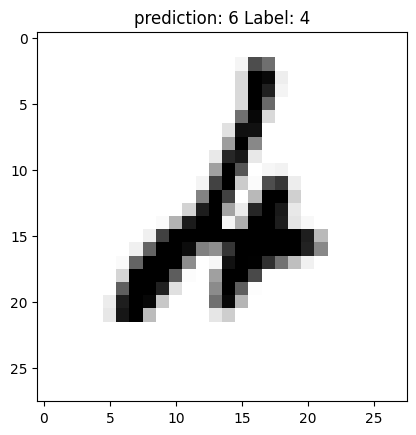

1/1 [==============================] - 0s 25ms/step


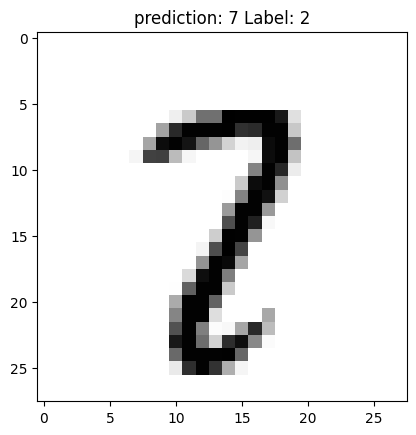

1/1 [==============================] - 0s 25ms/step


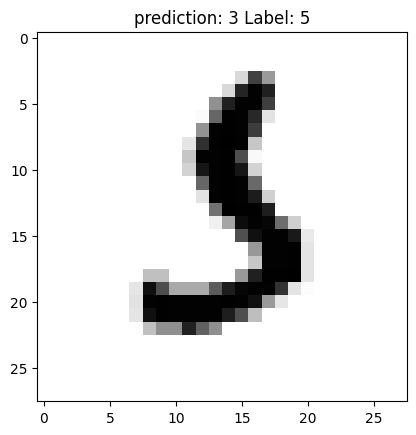

1/1 [==============================] - 0s 22ms/step


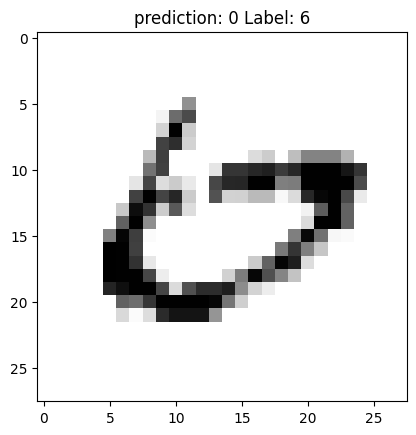

1/1 [==============================] - 0s 21ms/step


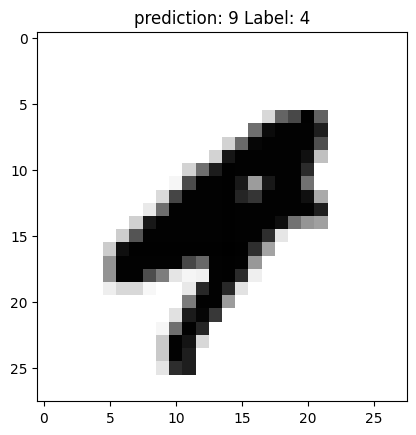

1/1 [==============================] - 0s 25ms/step


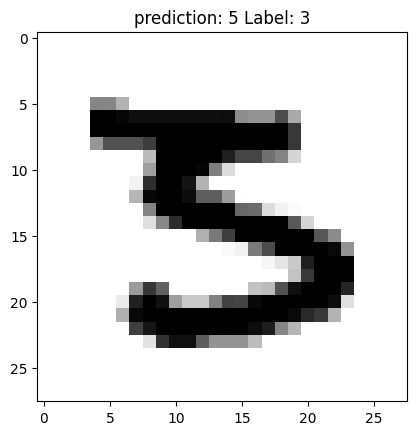

1/1 [==============================] - 0s 23ms/step


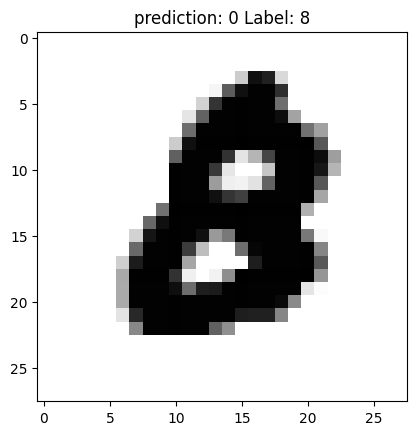

1/1 [==============================] - 0s 23ms/step


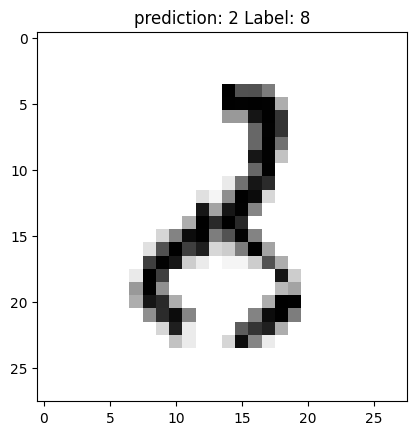

1/1 [==============================] - 0s 24ms/step


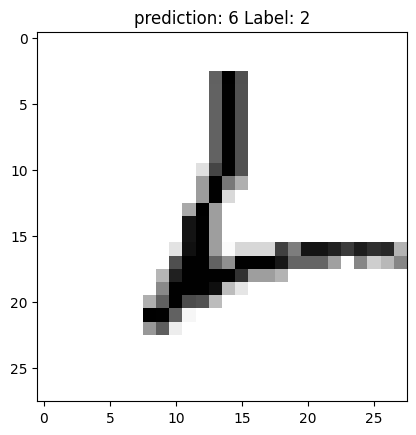

1/1 [==============================] - 0s 23ms/step


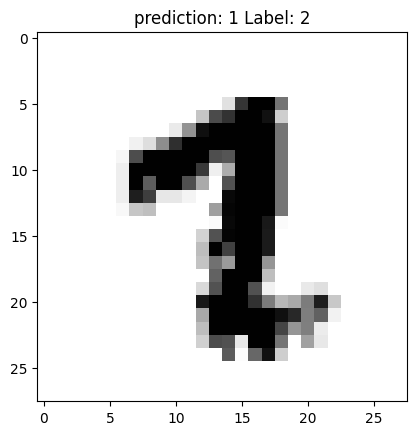

1/1 [==============================] - 0s 23ms/step


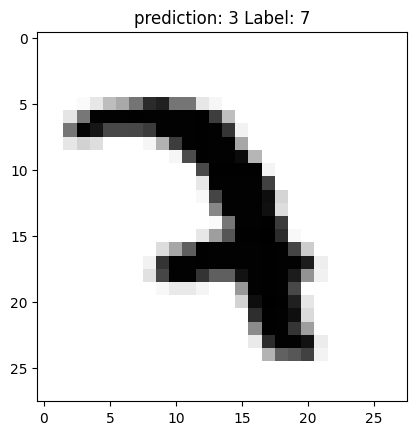

1/1 [==============================] - 0s 36ms/step


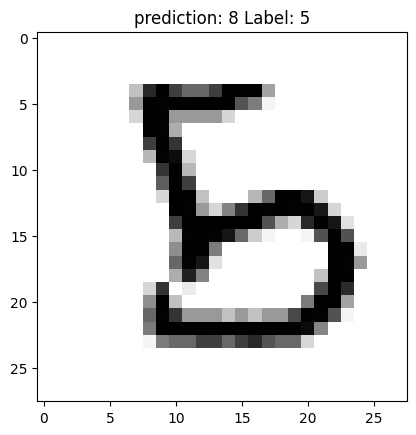

1/1 [==============================] - 0s 23ms/step


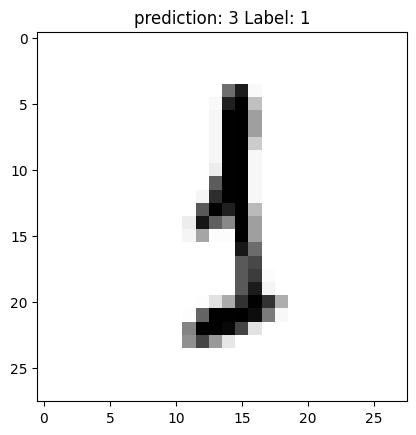

1/1 [==============================] - 0s 22ms/step


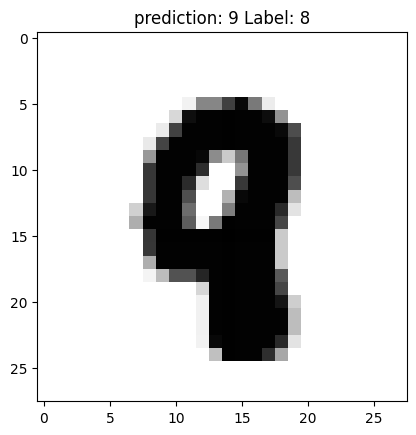

1/1 [==============================] - 0s 26ms/step


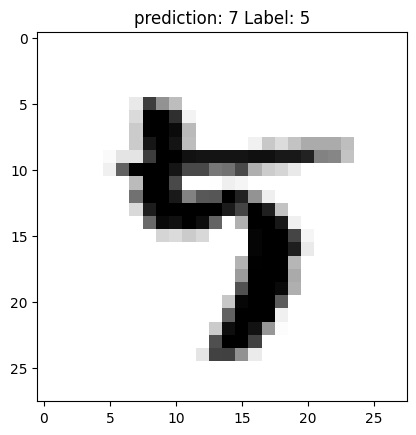

1/1 [==============================] - 0s 23ms/step


In [ ]:
for x in range(1000):
  test_image = test[x,:].reshape(1,784)
  predicted_cat = model.predict(test_image).argmax()
  label = test_labels[x].argmax()
  if (predicted_cat != label):
    plt.title('prediction: %d Label: %d' % (predicted_cat, label))
    plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
    plt.show()

THANK YOU